In [226]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.metrics import accuracy_score

%matplotlib inline

In [227]:
df =pd.read_csv(r"C:\Desktop\Toddler Autism dataset July 2018.csv")

In [228]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


# Removing Unnecessary Columns

In [229]:
del df['Case_No']
del df['Who completed the test']
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,Yes


# Replacing (Yes,No) to (1,0)

In [230]:
df.replace(('yes', 'no'), (1, 0), inplace=True)
df.replace(('Yes', 'No'), (1, 0), inplace=True)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,0,1,1


# Descriptive Statistics

In [231]:
df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
A1,1054.0,0.56,0.50,0.0,0.0,1.0,1.0,1.0
A2,1054.0,0.45,0.50,0.0,0.0,0.0,1.0,1.0
A3,1054.0,0.40,0.49,0.0,0.0,0.0,1.0,1.0
A4,1054.0,0.51,0.50,0.0,0.0,1.0,1.0,1.0
A5,1054.0,0.52,0.50,0.0,0.0,1.0,1.0,1.0
A6,1054.0,0.58,0.49,0.0,0.0,1.0,1.0,1.0
A7,1054.0,0.65,0.48,0.0,0.0,1.0,1.0,1.0
A8,1054.0,0.46,0.50,0.0,0.0,0.0,1.0,1.0
A9,1054.0,0.49,0.50,0.0,0.0,0.0,1.0,1.0
A10,1054.0,0.59,0.49,0.0,0.0,1.0,1.0,1.0


In [232]:
df.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice                int64
Family_mem_with_ASD     int64
Class/ASD Traits        int64
dtype: object

# Data Visualization

Text(0.5, 1.0, 'Gender')

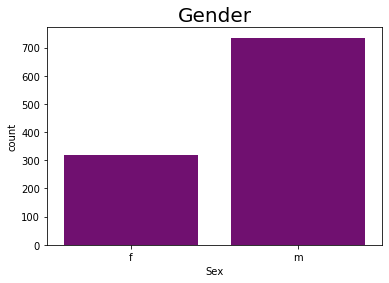

In [233]:
sns.countplot(data=df, x='Sex', color='purple')
plt.title('Gender', fontsize = 20)

Text(0.5, 1.0, 'Ethnicity')

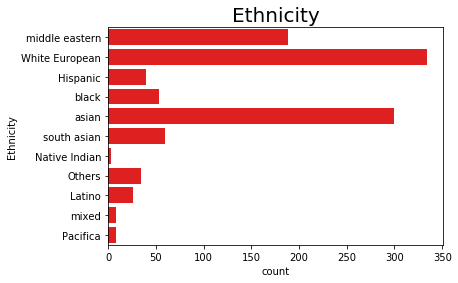

In [234]:
sns.countplot(data=df, y='Ethnicity', color='red')
plt.title('Ethnicity', fontsize = 20)

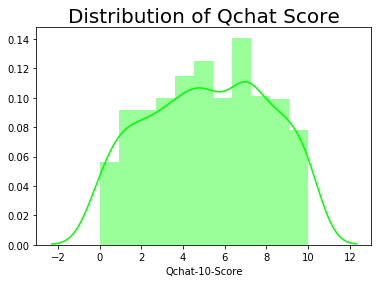

In [235]:
sns.distplot(df['Qchat-10-Score'], color= 'lime')
plt.title('Distribution of Qchat Score', fontsize = 20)
plt.show()

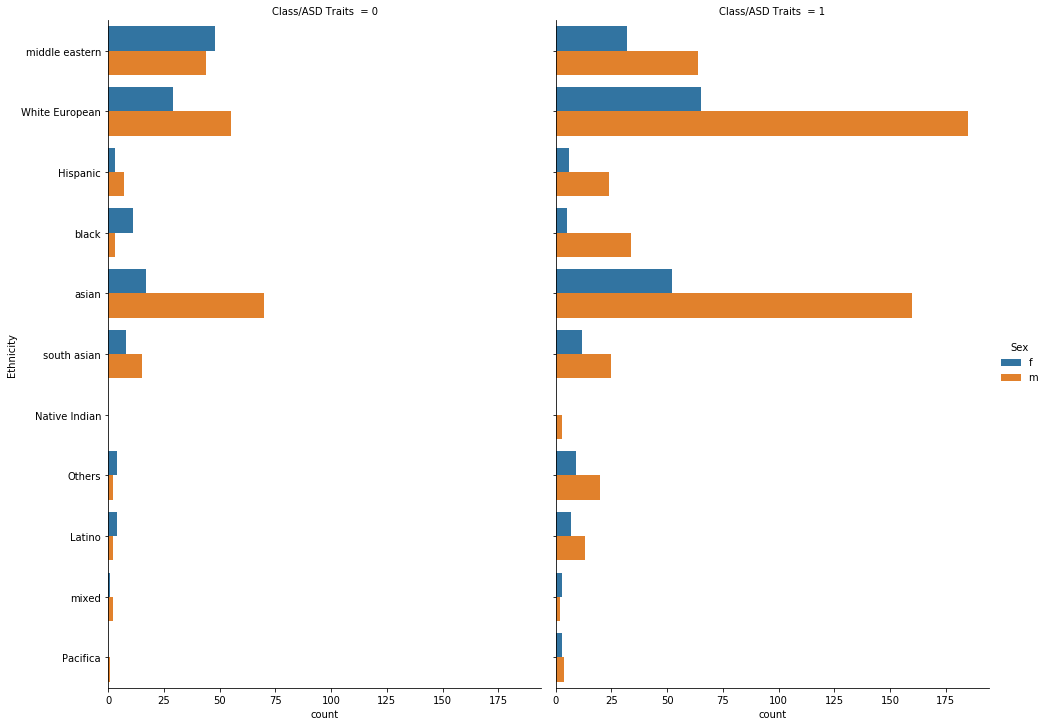

In [236]:
sns.catplot(y="Ethnicity", hue="Sex", col="Class/ASD Traits ",
                data=df, kind="count",
                height=10, aspect=.7);

# Correlation Analysis

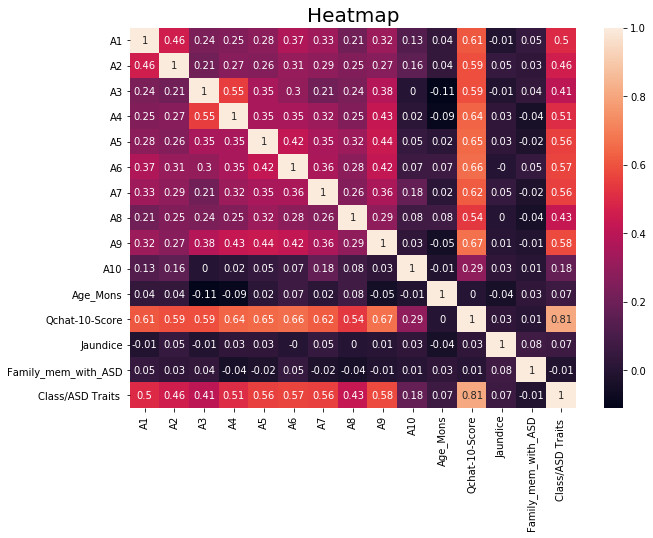

In [237]:
#Draw Heat and Map Diagram
plt.figure(figsize=(10,7))
sns.heatmap(df.corr().round(2), annot = True)
plt.title('Heatmap', fontsize = 20)
plt.show()

In [238]:
#Draw Correlation Table
corr=df.corr().round(2)
corr

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Jaundice,Family_mem_with_ASD,Class/ASD Traits
A1,1.00,0.46,0.24,0.25,0.28,0.37,0.33,0.21,0.32,0.13,0.04,0.61,-0.01,0.05,0.50
A2,0.46,1.00,0.21,0.27,0.26,0.31,0.29,0.25,0.27,0.16,0.04,0.59,0.05,0.03,0.46
A3,0.24,0.21,1.00,0.55,0.35,0.30,0.21,0.24,0.38,0.00,-0.11,0.59,-0.01,0.04,0.41
A4,0.25,0.27,0.55,1.00,0.35,0.35,0.32,0.25,0.43,0.02,-0.09,0.64,0.03,-0.04,0.51
A5,0.28,0.26,0.35,0.35,1.00,0.42,0.35,0.32,0.44,0.05,0.02,0.65,0.03,-0.02,0.56
A6,0.37,0.31,0.30,0.35,0.42,1.00,0.36,0.28,0.42,0.07,0.07,0.66,-0.00,0.05,0.57
A7,0.33,0.29,0.21,0.32,0.35,0.36,1.00,0.26,0.36,0.18,0.02,0.62,0.05,-0.02,0.56
A8,0.21,0.25,0.24,0.25,0.32,0.28,0.26,1.00,0.29,0.08,0.08,0.54,0.00,-0.04,0.43
A9,0.32,0.27,0.38,0.43,0.44,0.42,0.36,0.29,1.00,0.03,-0.05,0.67,0.01,-0.01,0.58
A10,0.13,0.16,0.00,0.02,0.05,0.07,0.18,0.08,0.03,1.00,-0.01,0.29,0.03,0.01,0.18


In [239]:
corr["Class/ASD Traits "].sort_values(ascending=False)

Class/ASD Traits       1.00
Qchat-10-Score         0.81
A9                     0.58
A6                     0.57
A7                     0.56
A5                     0.56
A4                     0.51
A1                     0.50
A2                     0.46
A8                     0.43
A3                     0.41
A10                    0.18
Jaundice               0.07
Age_Mons               0.07
Family_mem_with_ASD   -0.01
Name: Class/ASD Traits , dtype: float64

# Defining X (Input Variables) and Y (Target Variable)

In [240]:
#Drop Columns
df.replace(('m', 'f'), (1, 0), inplace=True) #replacing male with 1 and female with 0
x=df.drop(columns=['Class/ASD Traits ', 'Qchat-10-Score', 'Ethnicity'])
x

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD
0,0,0,0,0,0,0,1,1,0,1,28,0,1,0
1,1,1,0,0,0,1,1,0,0,0,36,1,1,0
2,1,0,0,0,0,0,1,1,0,1,36,1,1,0
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0
4,1,1,0,1,1,1,1,1,1,1,20,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,0,0,1
1050,0,0,1,1,1,0,1,0,1,0,12,1,1,0
1051,1,0,1,1,1,1,1,1,1,1,18,1,1,0
1052,1,0,0,0,0,0,0,1,0,1,19,1,0,1


In [241]:
y=df['Class/ASD Traits ']
y

0       0
1       1
2       1
3       1
4       1
       ..
1049    0
1050    1
1051    1
1052    0
1053    1
Name: Class/ASD Traits , Length: 1054, dtype: int64

# Data Partitation (Training 60%, Validation 20%, Test 20%)

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from dmba import classificationSummary, regressionSummary
from dmba import liftChart

In [243]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(x,y,test_size=0.25,random_state=0)

In [244]:
X_train.shape,X_test.shape,X_val.shape,Y_train.shape,Y_test.shape,Y_val.shape

((790, 14), (211, 14), (264, 14), (790,), (211,), (264,))

# Logistic Regression

In [245]:
# Below are the Standard Logistics Regression Function
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr1 = LogisticRegression(max_iter=1000).fit(X_train,Y_train)

In [246]:
score_lr1 = round(accuracy_score(lr1.predict(X_test),Y_test)*100,2)
score_lr1

100.0

In [247]:
#Find the accuracy of the model in percentage
print("Training model accuracy and confusion matrix")
classificationSummary(Y_train, lr1.predict(X_train))

print("Test model accuracy and confusion matrix")
classificationSummary(Y_test, lr1.predict(X_test))

print("Validation model accuracy and confusion matrix")
classificationSummary(Y_val, lr1.predict(X_val))

Training model accuracy and confusion matrix
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 252   0
     1   0 538
Test model accuracy and confusion matrix
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0  58   0
     1   0 153
Validation model accuracy and confusion matrix
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0  74   0
     1   0 190


# Naive Bayes

In [248]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train,Y_train)

In [249]:
score_nb = round(accuracy_score(nb.predict(X_test),Y_test)*100,2)
score_nb

93.84

In [250]:
#Find the accuracy of the model in percentage
print("Training model accuracy and confusion matrix")
classificationSummary(Y_train, nb.predict(X_train))

print("Test model accuracy and confusion matrix")
classificationSummary(Y_test, nb.predict(X_test))

print("Validation model accuracy and confusion matrix")
classificationSummary(Y_val, nb.predict(X_val))

Training model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.9481)

       Prediction
Actual   0   1
     0 235  17
     1  24 514
Test model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.9384)

       Prediction
Actual   0   1
     0  53   5
     1   8 145
Validation model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.9394)

       Prediction
Actual   0   1
     0  66   8
     1   8 182


# K Nearest Neighbors

In [251]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17).fit(X_train,Y_train)

In [252]:
results = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(knn.predict(X_test), Y_test)
    })
    
# Convert results to a pandas data frame
results = pd.DataFrame(results)
results

,k,accuracy
0,1,0.909953
1,3,0.947867
2,5,0.962085
3,7,0.947867
4,9,0.933649
5,11,0.947867
6,13,0.938389
7,15,0.952607
8,17,0.962085
9,19,0.952607


In [253]:
score_knn = round(accuracy_score(knn.predict(X_test),Y_test)*100,2)
score_knn

95.26

In [254]:
#Find the accuracy of the model in percentage
print("Training model accuracy and confusion matrix")
classificationSummary(Y_train, knn.predict(X_train))

print("Test model accuracy and confusion matrix")
classificationSummary(Y_test, knn.predict(X_test))

print("Validation model accuracy and confusion matrix")
classificationSummary(Y_val, knn.predict(X_val))

Training model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.9519)

       Prediction
Actual   0   1
     0 235  17
     1  21 517
Test model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.9526)

       Prediction
Actual   0   1
     0  56   2
     1   8 145
Validation model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.9508)

       Prediction
Actual   0   1
     0  70   4
     1   9 181


# Classification Tree

In [255]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5, random_state = 1234).fit(X_train,Y_train)

In [256]:
plt.rcParams.update({'figure.max_open_warning': 0})
score_dt = round(accuracy_score(dt.predict(X_test),Y_test)*100,2)
score_dt

91.0

In [257]:
#Find the accuracy of the model in percentage
print("Training model accuracy and confusion matrix")
classificationSummary(Y_train, dt.predict(X_train))

print("Test model accuracy and confusion matrix")
classificationSummary(Y_test, dt.predict(X_test))

print("Validation model accuracy and confusion matrix")
classificationSummary(Y_val, dt.predict(X_val))

Training model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.9392)

       Prediction
Actual   0   1
     0 215  37
     1  11 527
Test model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.9100)

       Prediction
Actual   0   1
     0  47  11
     1   8 145
Validation model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.8977)

       Prediction
Actual   0   1
     0  56  18
     1   9 181


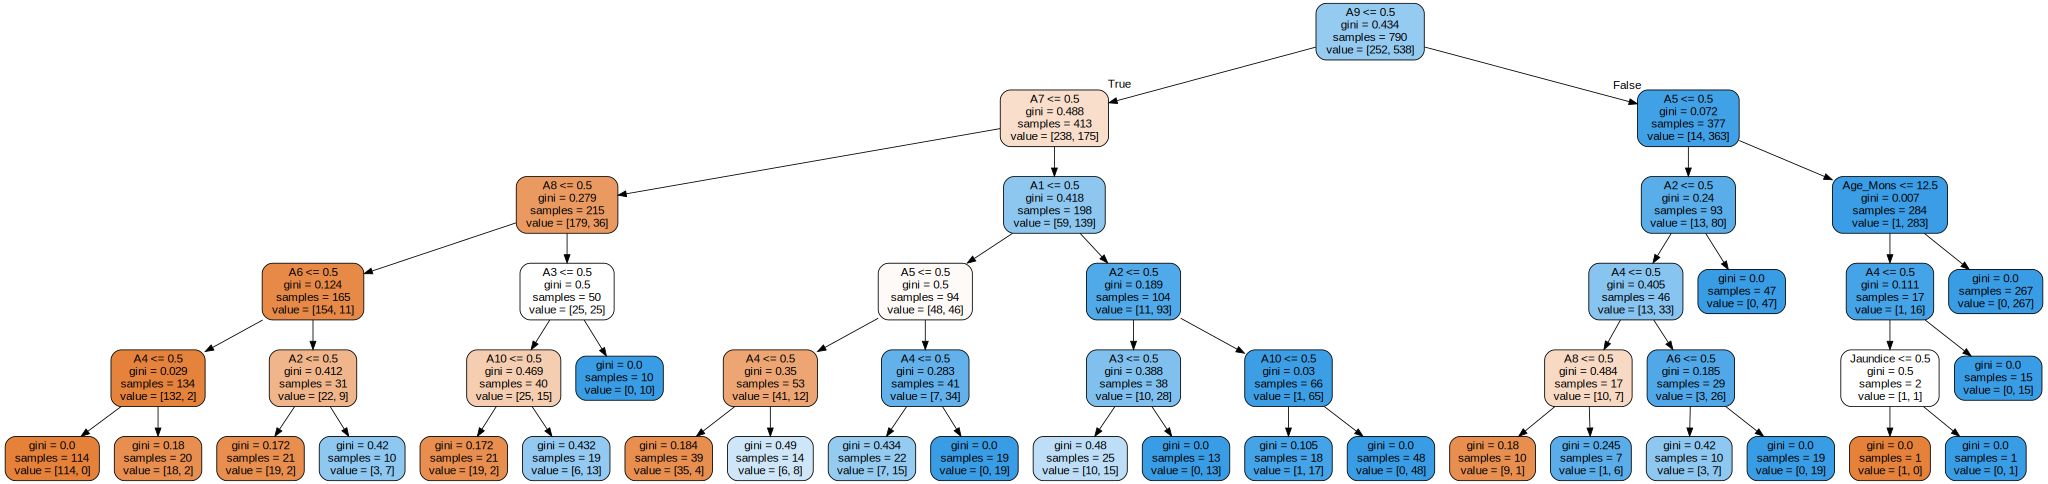

In [258]:
classification_tree= tree.export_graphviz(dt, out_file=None, filled=True, rounded=True, feature_names=X_train.columns)
graph=graphviz.Source(classification_tree)
graph

In [259]:
graph.render("Toddler Tree")

'Toddler Tree.pdf'

# Neural Network

In [260]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [261]:
NNet = MLPClassifier(hidden_layer_sizes=(3,8), activation='logistic', solver='lbfgs', random_state=1, max_iter=10000).fit(X_train, Y_train.ravel())

In [262]:
score_NNet = round(accuracy_score(NNet.predict(X_test),Y_test)*100,2)
score_NNet

100.0

In [263]:
#Find the accuracy of the model in percentage
print("Training model accuracy and confusion matrix")
classificationSummary(Y_train, NNet.predict(X_train))

print("Test model accuracy and confusion matrix")
classificationSummary(Y_test, NNet.predict(X_test))

print("Validation model accuracy and confusion matrix")
classificationSummary(Y_val, NNet.predict(X_val))

Training model accuracy and confusion matrix
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 252   0
     1   0 538
Test model accuracy and confusion matrix
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0  58   0
     1   0 153
Validation model accuracy and confusion matrix
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0  74   0
     1   0 190


# Descriminant Analysis

In [264]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
DA = LinearDiscriminantAnalysis().fit(X_train,Y_train)

In [265]:
score_DA = round(accuracy_score(DA.predict(X_test),Y_test)*100,2)
score_DA

96.21

In [266]:
#Find the accuracy of the model in percentage
print("Training model accuracy and confusion matrix")
classificationSummary(Y_train, DA.predict(X_train))

print("Test model accuracy and confusion matrix")
classificationSummary(Y_test, DA.predict(X_test))

print("Validation model accuracy and confusion matrix")
classificationSummary(Y_val, DA.predict(X_val))

Training model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.9620)

       Prediction
Actual   0   1
     0 245   7
     1  23 515
Test model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.9621)

       Prediction
Actual   0   1
     0  57   1
     1   7 146
Validation model accuracy and confusion matrix
Confusion Matrix (Accuracy 0.9621)

       Prediction
Actual   0   1
     0  72   2
     1   8 182


# Choosing the Best Algorithm based on Accuracy

In [267]:
scores = [score_lr1,score_nb,score_knn,score_dt,score_NNet,score_DA]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Neural Network", "Linear Discriminant Analysis"]

In [268]:
scores

[100.0, 93.84, 95.26, 91.0, 100.0, 96.21]

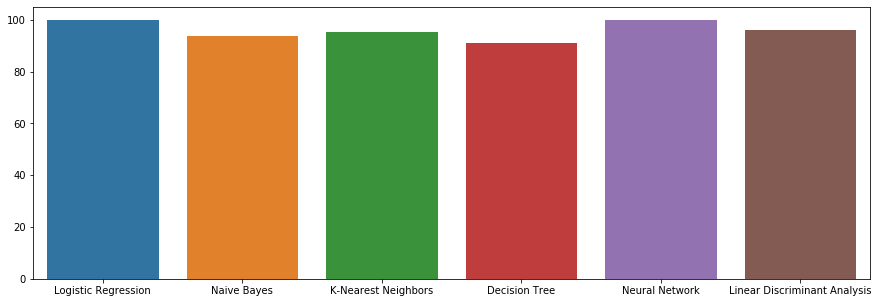

In [269]:
plt.figure(figsize=(15,5))
sns.barplot(x=algorithms,y=scores)
plt.show()

# Predicting if the new toddler has Autistic Spectrum Disorder (ASD) Traits

In [270]:
# new Toddler
newToddler = pd.DataFrame([{'A1': 0, 'A2': 0, 'A3': 0, 'A4': 0, 'A5': 0, 'A6': 1, 'A7': 0, 'A8': 0, 'A9': 1, 
'A10': 0, 'Age_Mons': 24, 'Sex': 0, 'Jaundice': 1, 'Family_mem_with_ASD': 0}],
columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 
'A10', 'Age_Mons', 'Sex', 'Jaundice', 'Family_mem_with_ASD'])
newToddler

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD
0,0,0,0,0,0,1,0,0,1,0,24,0,1,0


In [271]:
lr1.predict(newToddler)

array([0], dtype=int64)

In [272]:
nb.predict(newToddler)

array([1], dtype=int64)

In [273]:
knn.predict(newToddler)

array([0], dtype=int64)

In [274]:
dt.predict(newToddler)

array([0], dtype=int64)

In [275]:
NNet.predict(newToddler)

array([0], dtype=int64)

In [276]:
DA.predict(newToddler)

array([0], dtype=int64)